# `prep` Demo Notebook

Here we will be demo `prep` the Photometric Recommendation Pipeline. We will use the [ALeRCE](https://alerce.science/) data source methods in this demo.

We first import the ALeRCE class from `prep.source` and relevant packages,

In [3]:
from prep.source import alerce_api
import pandas as pd
import numpy as np

Next we will the default alerce query to obtain new detections using the `.query_alerce()` method. This method will return a pandas dataframe with the results of the query.

In [4]:
aq1 = alerce_api.query_alerce()

Then we will instantiate an ALeRCE object with the first queried result. This will allow us to access the data and methods of the ALeRCE class. We can use pandas `.iloc` to select the first row of the dataframe.

In [5]:
y1 = alerce_api.alerce_object(aq1.iloc[0])

Now we can obtain all sorts of information like lightcurve data and conduct a salt fit.

### Obtaining Lightcurve Data

We can use the `.get_lc()` method to obtain the lightcurve data. This method will return a pandas dataframe with the lightcurve data. This will add the `.lc_data` attribute to the ALeRCE object which is the DataFrame returned.

In [6]:
y1.get_lc()

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,corrected,dubious,step_id_corr,phase,parent_candid,drb,rfid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
3,ztf,60108.465093,2354465093215015002,2,2354465093215,19.649853,1,2354,1.992670,19.663197,...,False,False,1.2.0,0.0,NaN,0.999903,651120232.0,NaN,NaN,NaN
8,ztf,60109.462465,2355462463215015003,2,2355462463215,19.940067,1,2355,1.871265,19.795767,...,False,False,1.2.0,0.0,NaN,0.999980,651120232.0,NaN,NaN,NaN
9,ztf,60109.464444,2355464443215015000,2,2355464443215,19.757202,1,2355,1.639957,19.742455,...,False,False,1.2.0,0.0,NaN,0.999259,651120232.0,NaN,NaN,NaN
10,ztf,60109.466412,2355466413215015000,2,2355466413215,19.995678,1,2355,1.976395,19.759975,...,False,False,1.2.0,0.0,NaN,0.999989,651120232.0,NaN,NaN,NaN
11,ztf,60109.468380,2355468373215015004,2,2355468373215,20.040665,1,2355,1.952994,19.707340,...,False,False,1.2.0,0.0,NaN,0.999959,651120232.0,NaN,NaN,NaN
12,ztf,60109.468854,2355468854515015004,2,2355468854515,19.912216,1,2355,0.710728,19.883690,...,True,True,1.2.0,0.0,NaN,0.999706,652120245.0,19.448680,0.138605,0.141964
13,ztf,60109.471250,2355471254515015002,2,2355471254515,19.875252,1,2355,1.089679,19.716902,...,True,True,1.2.0,0.0,NaN,0.999931,652120245.0,19.334171,0.131586,0.134455
14,ztf,60109.473646,2355473644515015004,2,2355473644515,19.947628,1,2355,0.778839,19.784939,...,True,True,1.2.0,0.0,NaN,0.999980,652120245.0,19.381548,0.136143,0.139168
15,ztf,60109.476030,2355476034515015004,2,2355476034515,19.750595,1,2355,0.832159,19.688183,...,True,True,1.2.0,0.0,NaN,0.985117,652120245.0,19.313906,0.144681,0.147200
25,ztf,60111.460370,2357460373215015001,2,2357460373215,20.141327,1,2357,1.803261,19.780820,...,False,False,1.2.0,0.0,NaN,0.999826,651120232.0,NaN,NaN,NaN


### SALT Fit

We can use the `.salt3()` method to perform a SALT3 fit on the lightcurve data. This method will return a dictionary with the results of the fit. This will add the `.salt_parameters` attribute to the ALeRCE object which is the dictionary returned. You also have the option to plot the fit on the lightcurve by setting `plot=True`, this will also print the fit parameter results.

points fitted = 13
chisq = 1.635611184738506
phase = +0.6 days
z = 0.337
t0 = 60112
ms = 20.03
x1 = -2.55
c = -0.08


{'chisq': 1.635611184738506,
 'phase': 0.6468267316668062,
 'z': 0.33701518651952395,
 't0': 60112.21799582507,
 'ms': 20.027161506724635,
 'x1': -2.549574518393159,
 'c': -0.0806029933795544,
 'npoints': 13.0,
 'z_err': 0.17432992154855176,
 't0_err': 3.8858756361805717,
 'x0_err': 9.795897819169676e-05,
 'x1_err': 3.220316526740235,
 'c_err': 0.34462563841454014}

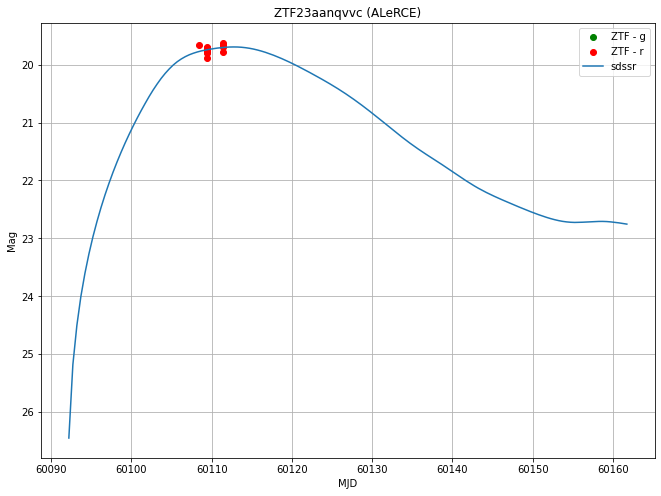

In [7]:
y1.salt3(plot=True)

### Posting to Slack and Saving to CSV

We can use the `build_rec` method to generate a recommendation message and post it to a Slack channel. This method will return a string with the recommendation message. We can use the `.post()` message to post to a channel of your choice.

In [8]:
from prep import build_rec

In [9]:
br=build_rec(y1)

In [10]:
br.post()

Posted to Slack


Also we can obtain a DataFrame row for the recommendation by using the `.df` attribute.

In [12]:
br.df

,name,ra,dec,chisq,phase,z,t0,ms,x1,c,npoints,z_err,t0_err,x0_err,x1_err,c_err,url
0,ZTF23aanqvvc,27.942765,34.915834,1.635611,0.646827,0.337015,60112.217996,20.027162,-2.549575,-0.080603,13.0,0.17433,3.885876,0.000098,3.220317,0.344626,https://alerce.online/object/ZTF23aanqvvc
